In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from IPython.display import clear_output
import scipy

from sklearn import preprocessing
from sklearn import cluster

import matplotlib.pyplot as plt

#import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.INFO)

#tf.enable_eager_execution()
#print("TensorFlow version: {}".format(tf.__version__))
#print("Eager execution: {}".format(tf.executing_eagerly()))
from abc import ABC, abstractmethod
from mpl_toolkits.mplot3d import Axes3D
import pickle
import mpl_toolkits.mplot3d.axes3d as p3


# for plotting
linestyles = ['--', '-.', '-', ':']
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [9]:
ls

ADAM.pkl
Analysis.ipynb
EXP_GD_KRYLOV_HIDDEN20_K41.pkl
EXP_GD_KRYLOV_HIDDEN20_K61.pkl
EXP_GD_KRYLOV_HIDDEN20_K81.pkl
EXP_GD_KRYLOV_PARTIAL_K_HIDDEN20_K41.pkl
EXP_GD_KRYLOV_PARTIAL_K_HIDDEN20_K61.pkl
EXP_GD_KRYLOV_PARTIAL_K_HIDDEN20_K81.pkl
EXP_KRYLOV_HIDDEN100_K101.pkl
EXP_KRYLOV_HIDDEN100_K41.pkl
EXP_KRYLOV_HIDDEN100_K61.pkl
EXP_KRYLOV_HIDDEN100_K81.pkl
EXP_KRYLOV_HIDDEN20_K41.pkl
EXP_KRYLOV_HIDDEN20_K61.pkl
EXP_KRYLOV_HIDDEN20_K81.pkl
EXP_KRYLOV_HIDDEN64_K64.pkl
EXP_KRYLOV_PARTIAL_K_HIDDEN20_K41.pkl
EXP_KRYLOV_PARTIAL_K_HIDDEN20_K61.pkl
EXP_KRYLOV_PARTIAL_K_HIDDEN20_K81.pkl
EXP_KRYLOV_PARTIAL_K_HIDDEN64_K64.pkl
Untitled.ipynb
krylov.ipynb
other_optimizers.ipynb
train.py
train.s


In [18]:
exps = ['ADAM',
        'EXP_KRYLOV_HIDDEN20_K41',      
        'EXP_KRYLOV_HIDDEN20_K61',           
        'EXP_KRYLOV_HIDDEN20_K81',
        'EXP_KRYLOV_HIDDEN64_K64',
        'EXP_KRYLOV_PARTIAL_K_HIDDEN20_K41',
        'EXP_KRYLOV_PARTIAL_K_HIDDEN20_K61',
        'EXP_KRYLOV_PARTIAL_K_HIDDEN20_K81',
        'EXP_KRYLOV_PARTIAL_K_HIDDEN64_K64'
]

exps_partial_k = [
'EXP_GD_KRYLOV_PARTIAL_K_HIDDEN20_K41',
'EXP_GD_KRYLOV_PARTIAL_K_HIDDEN20_K61',
'EXP_GD_KRYLOV_PARTIAL_K_HIDDEN20_K81',
'EXP_KRYLOV_PARTIAL_K_HIDDEN64_K64']



exps_large = ['EXP_KRYLOV_HIDDEN100_K41',      
        'EXP_KRYLOV_HIDDEN100_K61',           
        'EXP_KRYLOV_HIDDEN100_K81',
        'EXP_KRYLOV_HIDDEN100_K101'
             ]

exps_GD =  ['EXP_GD_KRYLOV_HIDDEN20_K41',
            'EXP_GD_KRYLOV_HIDDEN20_K61',
            'EXP_GD_KRYLOV_HIDDEN20_K81',
            'EXP_GD_KRYLOV_PARTIAL_K_HIDDEN20_K41',
            'EXP_GD_KRYLOV_PARTIAL_K_HIDDEN20_K61',
            'EXP_GD_KRYLOV_PARTIAL_K_HIDDEN20_K81',
]

exps = ['ADAM', 'EXP_KRYLOV_HIDDEN100_K101']

In [19]:
def show_results(exps, results):
    #first = 200
    last = 100
    plt.rcParams.update({'font.size': 10})

    linestyles = ['--', '-.', '-', ':']
    
    # COST function
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15,7))
    plt.suptitle('Cost Function')
    for i, r in enumerate(results):
        cost_hist = r['cost_hist']
        ax1.semilogy(np.array(cost_hist), linestyle = linestyles[i%4])
        ax2.semilogy(np.array(cost_hist[last:]), linestyle = linestyles[i%4],label = exps[i])
    
    ax1.set_ylim(1e-16,)
    #ax2.set_ylim(1e-16,)
    ax2.title.set_text('After '+str(abs(last))+' iterations')


    plt.legend()
    plt.show()

    # LOSS function
    fig, (ax1, ax2) = plt.subplots(ncols = 2,figsize = (15,7))
    plt.suptitle('Loss (without regularization term)')
    for i, r in enumerate(results):
        loss_hist = r['loss_hist']
        ax1.semilogy(np.array(loss_hist), linestyle = linestyles[i%4])
        ax2.semilogy(np.array(loss_hist[last:]), linestyle = linestyles[i%4], label = exps[i])

    ax1.set_ylim(1e-16,)
    #ax2.set_ylim(1e-16,)
    ax2.title.set_text('After '+str(abs(last))+' iterations')
    
    plt.legend()
    plt.show()

    fig, (ax1, ax2) = plt.subplots(ncols = 2,  figsize = (15,7))
    plt.suptitle('Gradient Norm')
    for i, r in enumerate(results):
        grad_hist = r['grad_hist']
        ax1.semilogy(np.array(grad_hist), linestyle = linestyles[i%4])
        ax2.semilogy(np.array(grad_hist[last:]), linestyle = linestyles[i%4], label = exps[i])

    plt.legend()
    plt.show()

    fig, ax = plt.subplots( figsize = (15,7))
    plt.title('Angle between Two Consecutive Search Directions')
    for i, r in enumerate(results):
        angle_hist = r['angle_hist']
        ax.plot(np.array(angle_hist),linestyle = linestyles[i%4], label = exps[i])

    plt.ylim(-1.1,1.1)
    plt.legend()
    plt.show()
    '''
    fig, ax = plt.subplots( figsize = (15,7))
    plt.suptitle('Condition Number')
    for i, r in enumerate(results):
        c_hist = r['condition_hist']
        
        ax.semilogy(np.array(c_hist), linestyle = linestyles[i%4], label = exps[i])

    plt.legend()
    '''
    plt.show()

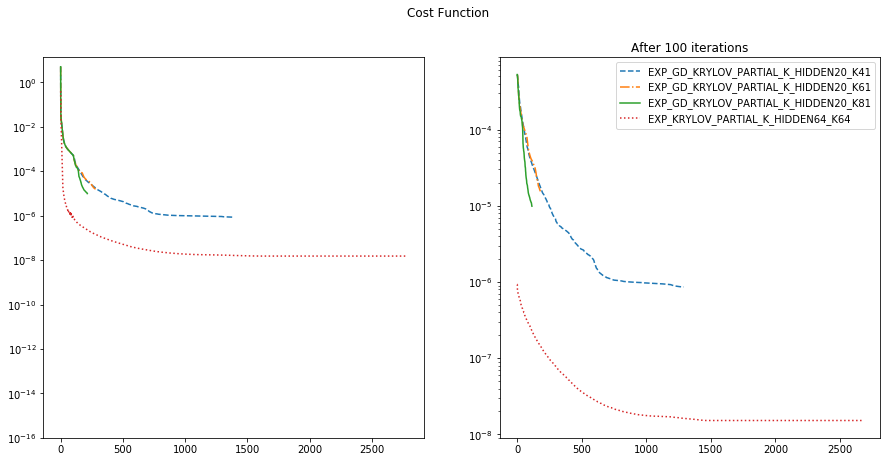

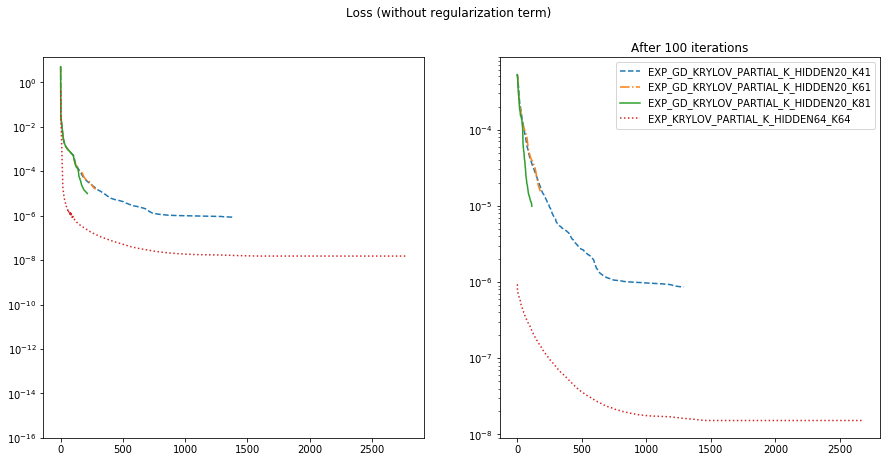

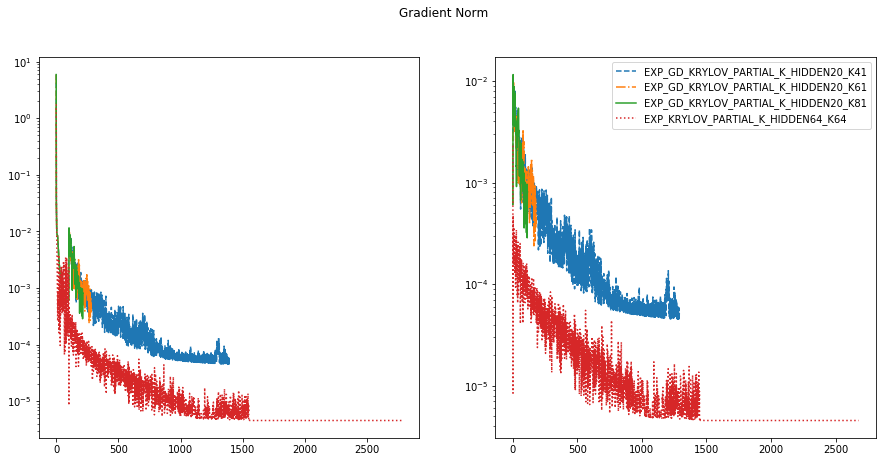

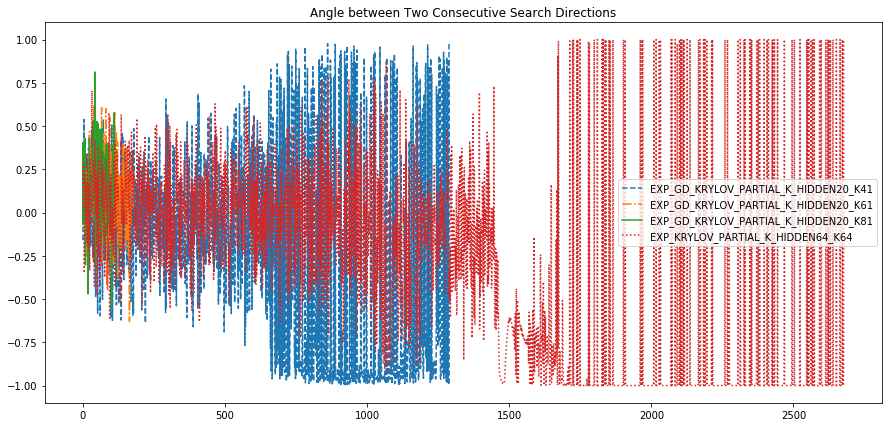

In [20]:
results_partial = []

for e in exps_partial_k:
    with open(e +'.pkl','rb') as f:
        r = pickle.load(f)
        results_partial.append(r)

show_results(exps_partial_k, results_partial)


In [26]:
def show_results(exps, results):
    #first = 200
    last = 100
    plt.rcParams.update({'font.size': 10})

    linestyles = ['--', '-.', '-', ':']
    
    # COST function
    fig, (ax1) = plt.subplots(ncols = 1, figsize = (7,7))
    plt.suptitle('Cost Function')
    for i, r in enumerate(results):
        cost_hist = r['cost_hist']
        ax1.semilogy(np.array(cost_hist), linestyle = linestyles[i%4],label = exps[i])
    
    ax1.set_ylim(1e-16,)
    #ax2.set_ylim(1e-16,)


    plt.legend()
    plt.show()

    # LOSS function
    fig, (ax1) = plt.subplots(ncols = 1,figsize = (15,7))
    plt.suptitle('Loss (without regularization term)')
    for i, r in enumerate(results):
        loss_hist = r['loss_hist']
        ax1.semilogy(np.array(loss_hist), linestyle = linestyles[i%4],label = exps[i])

    ax1.set_ylim(1e-16,)
    #ax2.set_ylim(1e-16,)
    
    plt.legend()
    plt.show()

    fig, (ax1) = plt.subplots(ncols = 1,  figsize = (15,7))
    plt.suptitle('Gradient Norm')
    for i, r in enumerate(results):
        grad_hist = r['grad_hist']
        ax1.semilogy(np.array(grad_hist), linestyle = linestyles[i%4],label = exps[i])

    plt.legend()
    plt.show()

    fig, ax = plt.subplots( figsize = (15,7))
    plt.title('Angle between Two Consecutive Search Directions')
    for i, r in enumerate(results):
        angle_hist = r['angle_hist']
        ax.plot(np.array(angle_hist),linestyle = linestyles[i%4], label = exps[i])

    plt.ylim(-1.1,1.1)
    plt.legend()
    plt.show()
    '''
    fig, ax = plt.subplots( figsize = (15,7))
    plt.suptitle('Condition Number')
    for i, r in enumerate(results):
        c_hist = r['condition_hist']
        
        ax.semilogy(np.array(c_hist), linestyle = linestyles[i%4], label = exps[i])

    plt.legend()
    '''
    plt.show()

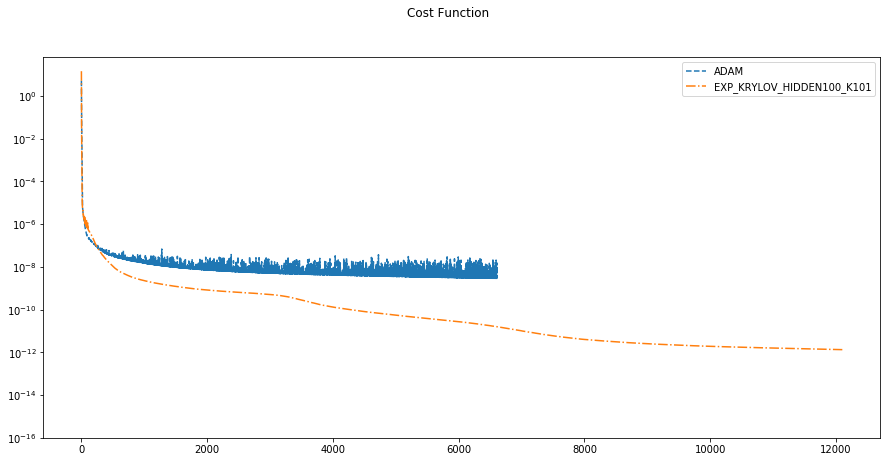

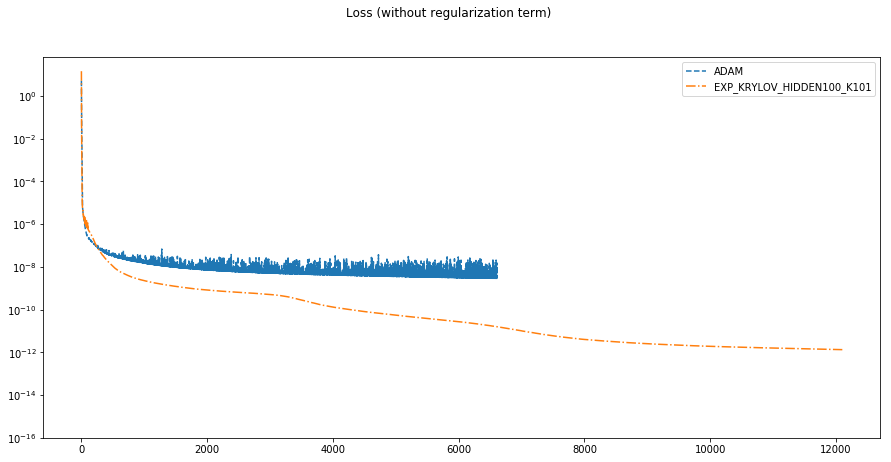

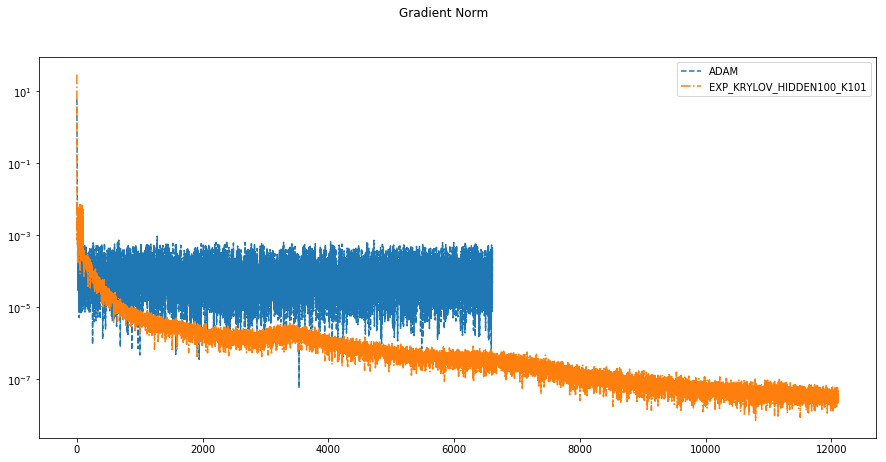

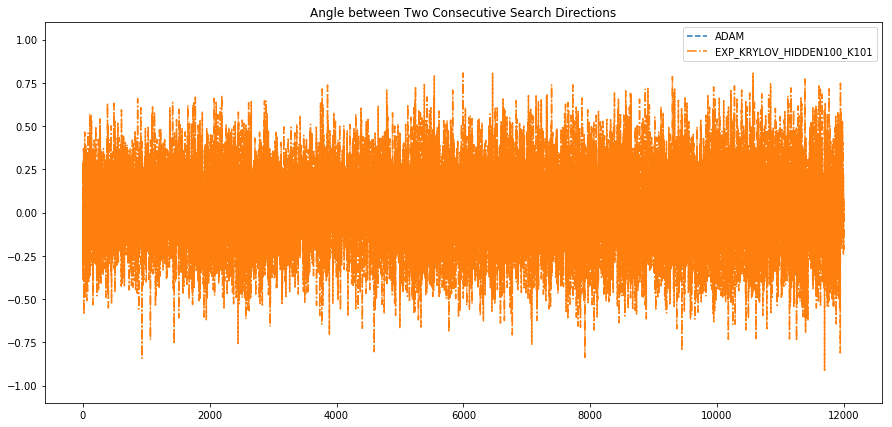

In [27]:
results = []

for e in exps:
    with open(e +'.pkl','rb') as f:
        r = pickle.load(f)
        results.append(r)

show_results(exps, results)

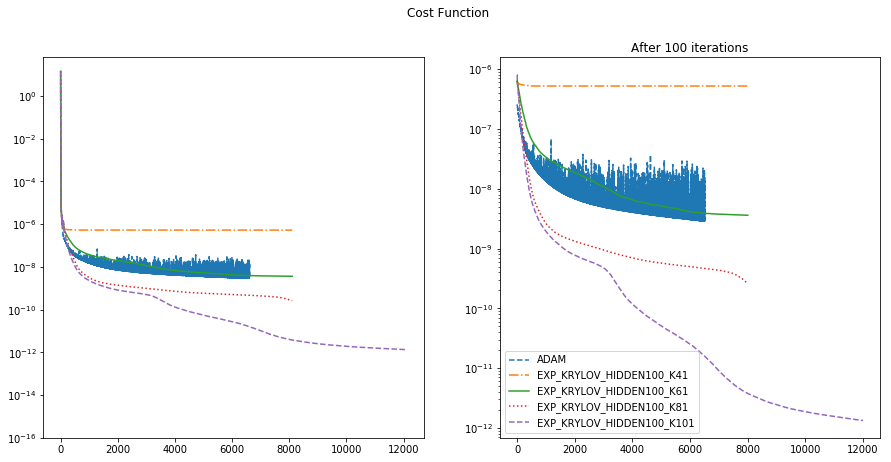

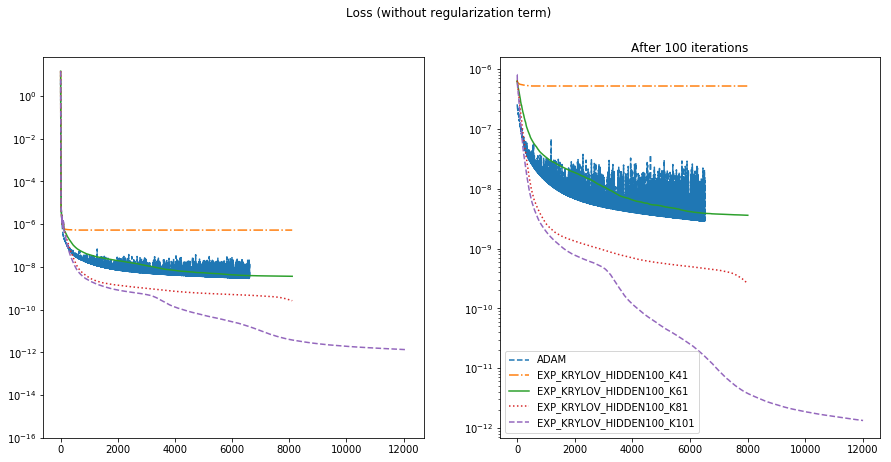

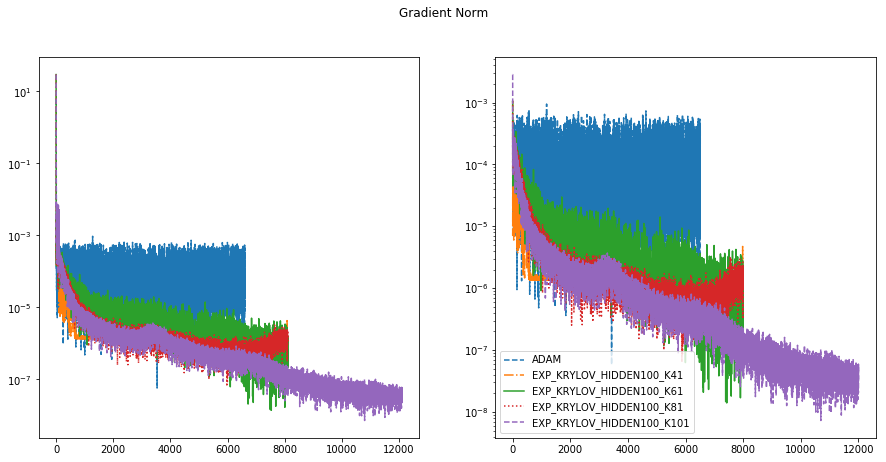

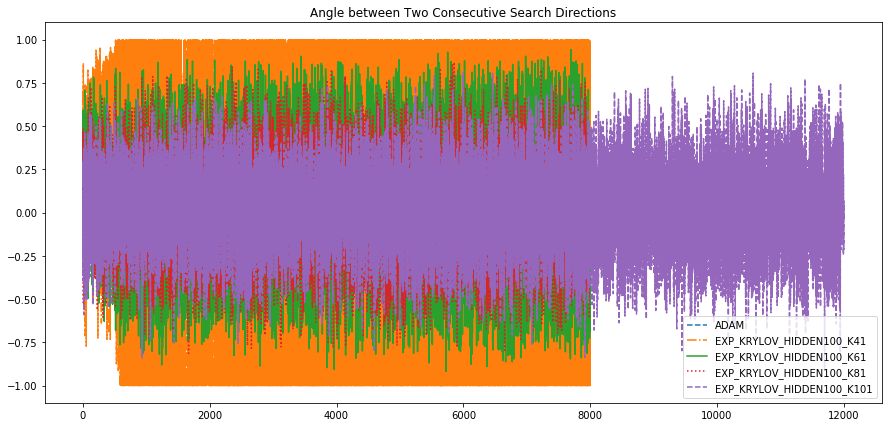

In [17]:
results_large = []

for e in exps_large:
    with open(e +'.pkl','rb') as f:
        r = pickle.load(f)
        results_large.append(r)

show_results(exps_large, results_large)

855
1955
311
1391
281
215


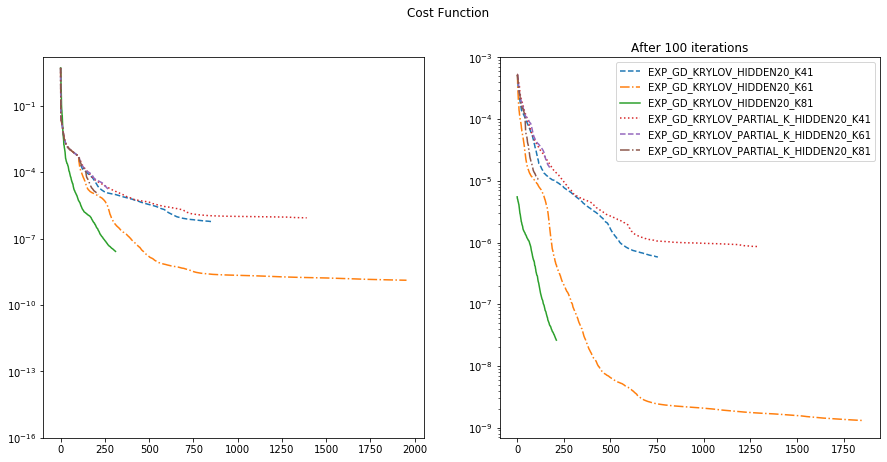

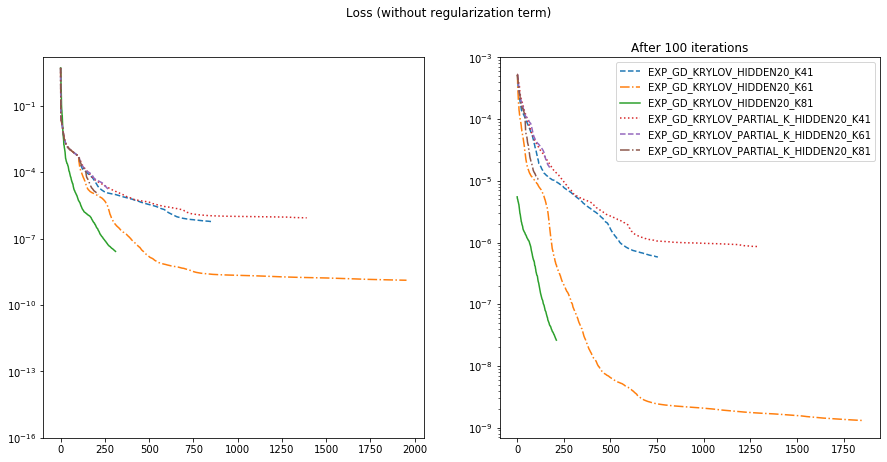

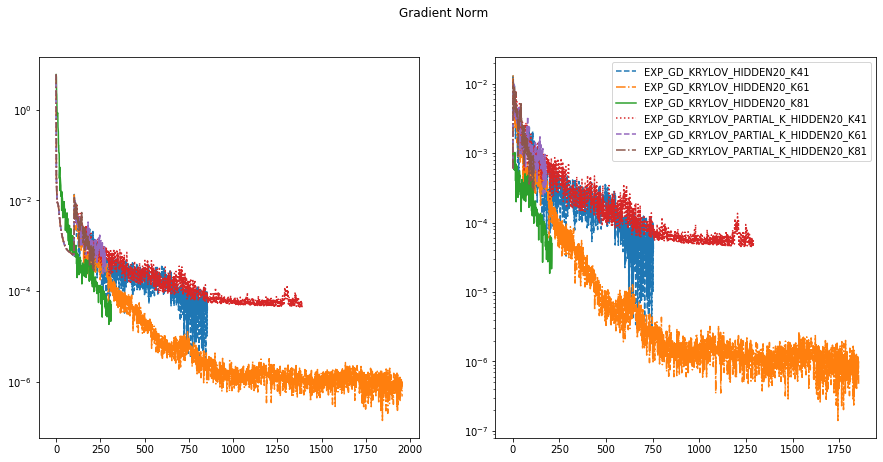

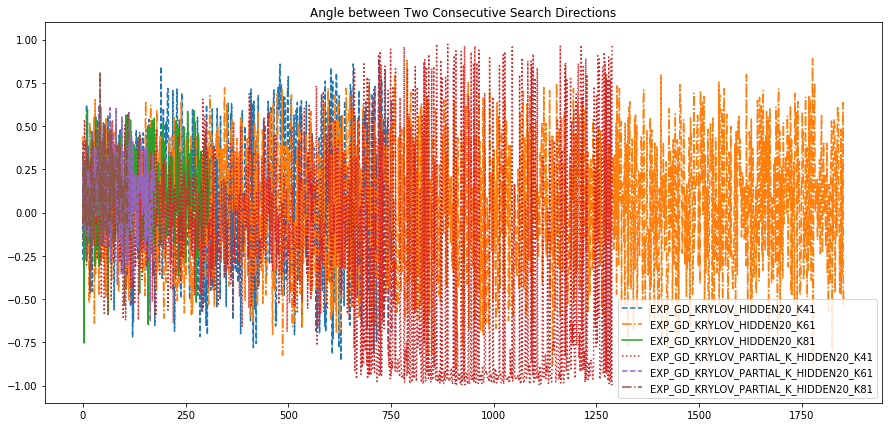

In [119]:
results_GD = []

for e in exps_GD:
    with open(e +'.pkl','rb') as f:
        r = pickle.load(f)
        results_GD.append(r)
        print(len(r['loss_hist']))

show_results(exps_GD, results_GD)

In [120]:
with open('EXP_GD_KRYLOV_HIDDEN20_K81' +'.pkl','rb') as f:
    r = pickle.load(f)

r['newton_krylov_diff_hist']

[3.461067032339559e-10,
 5.905647999269745e-10,
 4.5143038106847596e-08,
 3.476682206969331e-08,
 3.182840554564511e-08,
 3.050447250824738e-09,
 2.6751913551569762e-08,
 1.0837416167945845e-07,
 1.2128998884942577e-07,
 3.3312893984146684e-09,
 2.381177123719771e-06,
 1.1188738360952422e-09,
 9.452393256080111e-09,
 4.121223980179046e-10,
 3.245085902586452e-08,
 1.1974039725706694e-08,
 5.830959512619661e-07,
 3.353256562517757e-08,
 5.224076522252553e-08,
 2.3727611706323097e-07,
 4.042052053889475e-08,
 5.185096993249565e-08,
 4.989678516974532e-09,
 1.6924076943838246e-08,
 5.0387994998823586e-08,
 8.600266469081787e-08,
 4.117450281395552e-08,
 2.8543462859848557e-08,
 2.9258430179950363e-07,
 1.5058155753326504e-10,
 2.818570807900128e-08,
 1.5164789547684045e-08,
 6.564887735165907e-08,
 1.1206051619621122e-08,
 1.7123603019253106e-08,
 1.9793713739542604e-06,
 3.0358857641876637e-07,
 3.804136219487779e-07,
 9.193341477287885e-09,
 7.225378012893267e-08,
 7.99894492513432e-09,

## |dX|

In [1]:
def show_dx(results):
    plt.figure(figsize = (15,7))
    plt.title('|dX|')

    for i, r in enumerate(results):
            plt.semilogy(r['step_length_hist'],linestyle = linestyles[i%4],label = exps[i])
            #print(np.min(r['step_length_hist']))
            #plt.plot(np.array(r['step_length_hist'])[1:]/np.array(r['step_length_hist'])[0:-1],linestyle = linestyles[i%4])
            #plt.ylim(0,2)

    plt.legend()
    plt.show()


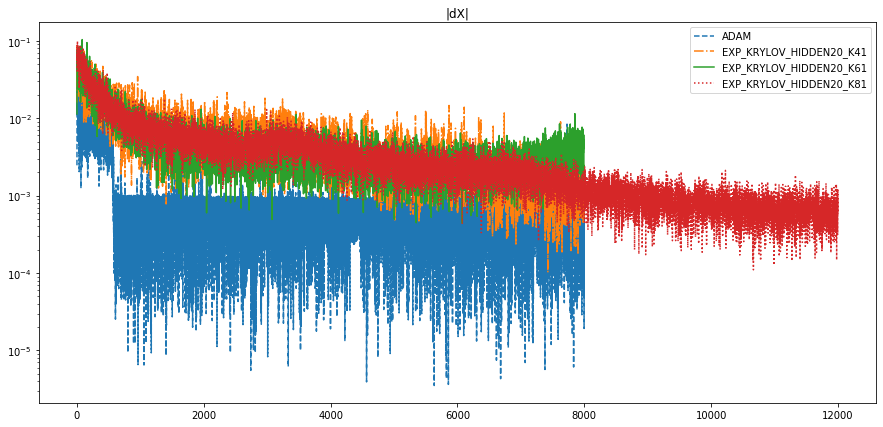

In [8]:
show_dx(results_large)